In [4]:
import pandas as pd
from skfda import FDataGrid
import numpy as np
import matplotlib.pyplot as plt 
from skfda.exploratory.visualization.clustering import plot_clusters
plt.rcParams['figure.figsize'] = [15, 10]

In [5]:
diff = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\pkl_files\neutron_hfo2.pkl")

In [6]:
q = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\pkl_files\neutron_hfo2_q.pkl")

In [7]:
diff = diff.to_numpy()
diff

array([[0.        , 0.        , 0.        , ..., 0.05151775, 0.0475572 ,
        0.04330404],
       [0.        , 0.        , 0.        , ..., 0.00379414, 0.00333948,
        0.00291064],
       [0.        , 0.        , 0.        , ..., 0.02601298, 0.02340744,
        0.02082356],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02117529, 0.01925634,
        0.01734916],
       [0.        , 0.        , 0.        , ..., 0.01983364, 0.01930938,
        0.01855325],
       [0.        , 0.        , 0.        , ..., 0.00132481, 0.00118536,
        0.00104676]])

In [8]:
q = q.to_numpy()

In [9]:
#change to datagrid object
data_matrix = diff
grid_points = q
grid_points
q = np.linspace(0, 8, 16000)
q

array([0.00000000e+00, 5.00031252e-04, 1.00006250e-03, ...,
       7.99899994e+00, 7.99949997e+00, 8.00000000e+00])

In [10]:
grid = FDataGrid(data_matrix, q)

In [11]:
import matplotlib.pyplot as plt

from skfda.ml.clustering import KMeans

In [12]:
n_clusters = 4
seed = 0

In [13]:
kmeans = KMeans(n_clusters=n_clusters, random_state = seed)
kmeans.fit(grid)
pred_labels = kmeans.predict(grid)


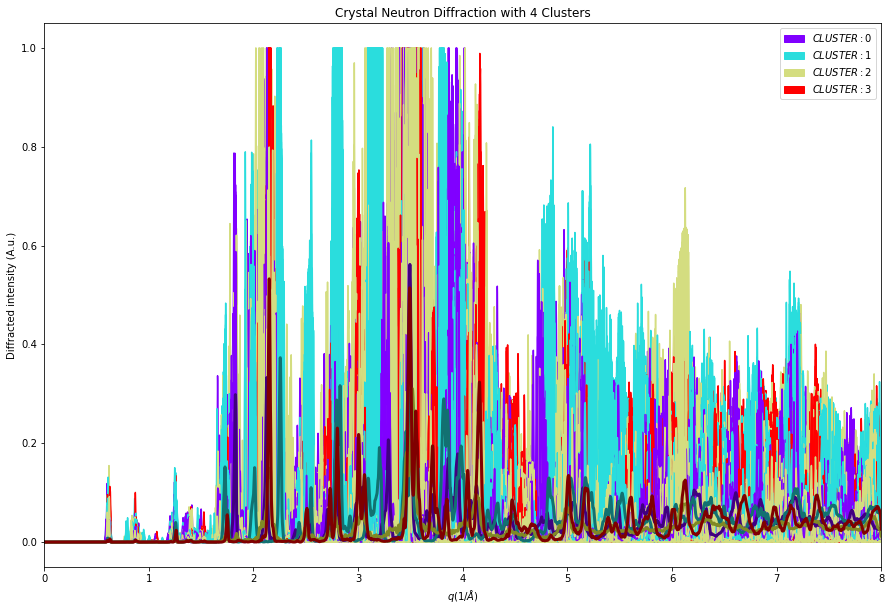

In [14]:
plot_clusters(kmeans, grid)
plt.xlim([q.min(), q.max()])
plt.xlabel('$q (1/\AA)$')
plt.ylabel('Diffracted intensity (A.u.)')
plt.title('Crystal Neutron Diffraction with 4 Clusters')
plt.show()

In [17]:
pred_labels

array([1, 0, 3, ..., 0, 2, 2])

In [28]:
link = r"C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl"
df_labels = pd.read_pickle(link)
df_labels

,ID,labels_0_3,labels_0_4
0,Ag_HfO2_cat_3.125_222_m,m,m
1,Ag_HfO2_cat_3.125_222_o,o,o
2,Ag_HfO2_cat_3.125_222_p-o,p-o,p-o
3,Ag_HfO2_cat_3.125_222_t,t,t
4,Ag_HfO2_cat_6.25_122_m,m,m
...,...,...,...
1720,Zr_HfO2_inter_6.25_212_t,t,t
1721,Zr_HfO2_inter_6.25_221_m,m,m
1722,Zr_HfO2_inter_6.25_221_o,o,o
1723,Zr_HfO2_inter_6.25_221_p-o,p-o,unknown


In [29]:
df_labels['labels_0_3'].replace({'m':1, 'p-o':0, 'o':3, 't':2}, inplace=True)
y_true = df_labels["labels_0_3"]
y_true

0       1
1       3
2       0
3       2
4       1
       ..
1720    2
1721    1
1722    3
1723    0
1724    2
Name: labels_0_3, Length: 1725, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, pred_labels)

array([[ 13,   1, 141, 305],
       [  0, 457,   3,   0],
       [ 12,   5, 430,  13],
       [318,   0,  27,   0]], dtype=int64)